<a href="https://colab.research.google.com/github/estskyway/project_data_analystics/blob/main/codes/LDA/san_LDA_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install python-mecab-ko pyLDAvis

In [2]:
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [10]:
import pandas as pd
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023pythons/datasets/total_data.csv')
df = pd.read_csv('../../datasets/total_data.csv')
df[:2]

,Unnamed: 0,_id,name,reviews,stars,tokenized_review,replaced_review,preprocess_review,rating,classification
0,0,651277e7ddb81e8e96c6bcbb,Google 사용자,입장방식은 변경됐는데 어플은 여전히 바코드만 보여집니다. 짐에서는 더이상 바코드스캔...,별표 5개 만점에 1개를 받았습니다.,입장 방식 은 변경 됐 는데 어 플 은 여전히 바코드 만 보여집니다 . 짐 에서 는...,입장 방식 은 수정 됐 는데 어 플 은 여전히 바코드 만 보여집니다 . 운동시설 에...,입장 방식 수정 돼다 여전하다 보이다 운동 시설 늘다 더 스캔 아니다 입장 바뀌다 ...,1.0,부정
1,1,651277e7ddb81e8e96c6bcbc,Google 사용자,정말 답답하네요 하나. GPS 100프로 신뢰하나요? 시설선택목록에서 안보임 4월말...,별표 5개 만점에 1개를 받았습니다.,정말 답답 하 네요 하나 . GPS 100 프로 신뢰 하 나요 ? 시설 선택 목록 ...,정말 답답 하 네요 하나 . GPS 100 프로 신뢰 하 나요 ? 시설 선택 목록 ...,답답 GPS 100 프로 신뢰 시설 선택 목록 보임 문제 은행 아니다 로그인 타임 ...,1.0,부정


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2878 entries, 0 to 2877
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2878 non-null   int64  
 1   _id                2878 non-null   object 
 2   name               2878 non-null   object 
 3   reviews            2878 non-null   object 
 4   stars              2118 non-null   object 
 5   tokenized_review   2878 non-null   object 
 6   replaced_review    2878 non-null   object 
 7   preprocess_review  2823 non-null   object 
 8   rating             2118 non-null   float64
 9   classification     2878 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 225.0+ KB


In [12]:
df_drop = df.drop(['stars','rating'], axis=1)
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2878 entries, 0 to 2877
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         2878 non-null   int64 
 1   _id                2878 non-null   object
 2   name               2878 non-null   object
 3   reviews            2878 non-null   object
 4   tokenized_review   2878 non-null   object
 5   replaced_review    2878 non-null   object
 6   preprocess_review  2823 non-null   object
 7   classification     2878 non-null   object
dtypes: int64(1), object(7)
memory usage: 180.0+ KB


In [13]:
df = df_drop.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2823 entries, 0 to 2877
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         2823 non-null   int64 
 1   _id                2823 non-null   object
 2   name               2823 non-null   object
 3   reviews            2823 non-null   object
 4   tokenized_review   2823 non-null   object
 5   replaced_review    2823 non-null   object
 6   preprocess_review  2823 non-null   object
 7   classification     2823 non-null   object
dtypes: int64(1), object(7)
memory usage: 198.5+ KB


### negative 분류

In [14]:
negative_count = len(df[df['classification'] == '부정'])
negative_count

629

In [15]:
df_num_pos = len(df[df['classification'] == '긍정'])
df_num_neg = len(df[df['classification'] == '부정'])
df_num_tot = df_num_pos + df_num_neg

print(f"분석한 리뷰 총 개수: {df_num_tot}")
print(f"긍정적 리뷰: {df_num_pos}개({(df_num_pos/df_num_tot)*100:.2f}%)")
print(f"부정적 리뷰: {df_num_neg}개({(df_num_neg/df_num_tot)*100:.2f}%)")

분석한 리뷰 총 개수: 2823
긍정적 리뷰: 2194개(77.72%)
부정적 리뷰: 629개(22.28%)


In [16]:
negative_list = list(df[df['classification'] == '부정']['classification'])
negative_list

['부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',
 '부정',

In [17]:
negative_data = df[df['classification'] == '부정']['preprocess_review'].str.split().tolist()
negative_data

[['입장',
  '방식',
  '수정',
  '돼다',
  '여전하다',
  '보이다',
  '운동',
  '시설',
  '늘다',
  '더',
  '스캔',
  '아니다',
  '입장',
  '바뀌다',
  '늘다',
  '나가다',
  '늘다',
  '상황',
  '고치다',
  '용다',
  '일자',
  '대해',
  '보상',
  '처리',
  '늘다',
  '지우다',
  '똑같다',
  '상태',
  '도대체',
  '가능'],
 ['답답',
  'GPS',
  '100',
  '프로',
  '신뢰',
  '시설',
  '선택',
  '목록',
  '보임',
  '문제',
  '은행',
  '아니다',
  '로그인',
  '타임',
  '아웃',
  '적용',
  '불편',
  '감수',
  '면서',
  '실리다',
  '충분',
  'Test',
  '적용',
  '근래',
  '멀다',
  '화면',
  '바뀌다',
  '관리',
  '고객',
  '안중',
  '없다',
  '보임',
  '쫒다',
  '어설프다'],
 ['입장',
  '시설',
  '검색',
  '입장',
  '기존',
  '사이트',
  '개선',
  '로그인',
  '위치',
  '자동',
  '검색',
  '시설',
  '수동',
  '검색',
  '입장',
  '늘다',
  '없다',
  '불편',
  '덕분',
  '사이트',
  '여러',
  '삭제',
  '끄다',
  '애꿎',
  '잔뜩',
  '사이트',
  '돌아가다',
  '싶다'],
 ['28',
  '개선',
  '로그인',
  '정보',
  '기억',
  '로그인',
  '정보',
  '입력',
  '체크',
  '박스',
  '설정',
  '안되다',
  '년',
  '가격',
  '50',
  '계속',
  '늘다',
  '늘다',
  '강습',
  '포함',
  '12'],
 ['사이트',
  '개선',
  '시설',
  '사이트',
  '접속',
  '설치',
  '접속',
  '프라',

In [18]:
len(negative_data)

629

### 넘파이 문제 해결방법

In [19]:
# !pip uninstall numpy

In [20]:
# !pip install numpy

In [21]:
# import numpy as np

In [22]:
# pip --version numpy

In [23]:
# !pip install numba --upgrade

                                              0.0/2.6 MB ? eta -:--:--
     --------                                 0.5/2.6 MB 11.1 MB/s eta 0:00:01
     ----------------                         1.0/2.6 MB 13.1 MB/s eta 0:00:01
     ------------------------                 1.6/2.6 MB 12.8 MB/s eta 0:00:01
     --------------------------------         2.1/2.6 MB 12.2 MB/s eta 0:00:01
     ---------------------------------------  2.6/2.6 MB 11.8 MB/s eta 0:00:01
     ---------------------------------------- 2.6/2.6 MB 11.0 MB/s eta 0:00:00
                                              0.0/28.1 MB ? eta -:--:--
                                              0.5/28.1 MB 10.2 MB/s eta 0:00:03
     -                                        1.0/28.1 MB 10.9 MB/s eta 0:00:03
     --                                       1.5/28.1 MB 10.8 MB/s eta 0:00:03
     --                                       2.1/28.1 MB 11.0 MB/s eta 0:00:03
     ---                                      2.6/28.1 MB 11.8 

In [ ]:
# !pip install numpy==1.23.0

### Dictionary

In [24]:
# pip install --upgrade numpy

In [25]:
# pip install --upgrade gensim

In [26]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel # 주제어 확인

In [27]:
preprocessed_sentences = negative_data

In [28]:
dictionary = Dictionary(preprocessed_sentences) # fix in like sklean
dictionary

In [29]:
dictionary.doc2bow(preprocessed_sentences[0])

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 4),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 2),
 (24, 1),
 (25, 1)]

In [30]:
corpus_list = list()
for sentence in preprocessed_sentences:
    morphs_vector = dictionary.doc2bow(sentence)
    corpus_list.append(morphs_vector)
# corpus_list

In [42]:
lda_model = LdaModel(corpus=corpus_list, id2word=dictionary, num_topics=3) # fix

### LDA 분석

In [33]:
# 일관성 점수
from gensim.models.coherencemodel import CoherenceModel
coherenceModel = CoherenceModel(model=lda_model, texts=negative_data, dictionary=dictionary)
coherenceModel.get_coherence()

0.3270940167572616

In [34]:
# 혼잡도 점수
lda_model.log_perplexity(corpus_list)

-6.420184688275797

In [64]:
start_topic = 2
end_topic = 10
coherence_scores = list()
perplexity_scores = list()
for topic_number in range(start_topic, end_topic+1):
    lda_model = LdaModel(corpus=corpus_list, id2word=dictionary, num_topics=topic_number) # fix
    coherenceModel = CoherenceModel(model=lda_model, texts=negative_data, dictionary=dictionary)
    coherence_scores.append(coherenceModel.get_coherence()) # 일관성 점수
    perplexity_scores.append(lda_model.log_perplexity(corpus_list))


In [65]:
negative_score = pd.DataFrame([coherence_scores, perplexity_scores]).T
negative_score

,0,1
0,0.307188,-6.412737
1,0.291917,-6.540003
2,0.301692,-6.631695
3,0.307963,-6.694356
4,0.300078,-6.736927
5,0.316542,-6.830380
6,0.299236,-6.841081
7,0.304815,-6.891764
8,0.318983,-6.926819


In [66]:
negative_score.rename(columns={0:'coherence_scores', 1:'perplexity_scores'}, inplace=True)
negative_score.index = range(2, 11)

In [67]:
negative_score

,coherence_scores,perplexity_scores
2,0.307188,-6.412737
3,0.291917,-6.540003
4,0.301692,-6.631695
5,0.307963,-6.694356
6,0.300078,-6.736927
7,0.316542,-6.830380
8,0.299236,-6.841081
9,0.304815,-6.891764
10,0.318983,-6.926819


In [84]:
lda_model_negative = LdaModel(corpus=corpus_list, id2word=dictionary, num_topics=2)

In [85]:
lda_model_negative.print_topics(num_words=7)

[(0,
  '0.043*"늘다" + 0.030*"개선" + 0.029*"사이트" + 0.015*"않다" + 0.014*"화면" + 0.014*"시설" + 0.013*"없다"'),
 (1,
  '0.029*"늘다" + 0.020*"사이트" + 0.019*"로그인" + 0.016*"오류" + 0.016*"시설" + 0.015*"개선" + 0.013*"운동"')]

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\koreavc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\koreavc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\koreavc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\koreavc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

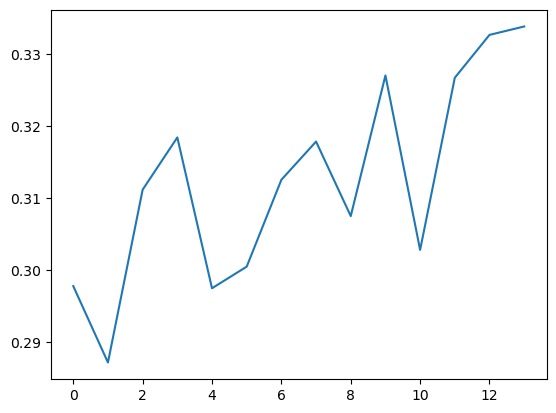

C:\Users\koreavc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\koreavc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\koreavc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\koreavc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

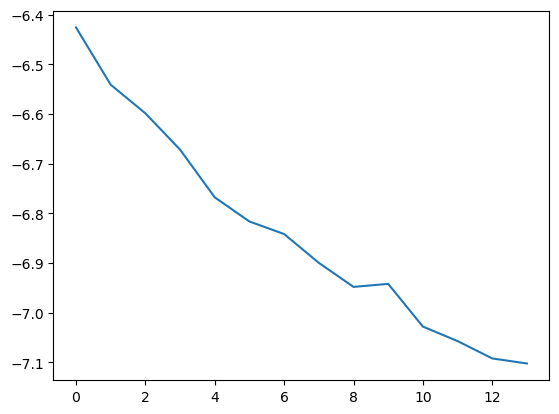

In [38]:
sns.lineplot(coherence_scores)
plt.show()
sns.lineplot(perplexity_scores)
plt.show()

### 시각화

In [ ]:
# !pip install pyLDAvis

In [54]:
import pyLDAvis.gensim_models

In [86]:
pyLDAvis.enable_notebook() # 일반 python에선 불필요
result_visualized = pyLDAvis.gensim_models.prepare(lda_model_negative, corpus_list, dictionary)

In [87]:
pyLDAvis.display(result_visualized)

In [88]:
pyLDAvis.save_html(result_visualized, '../../datasets/visualization_negative.html')